In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

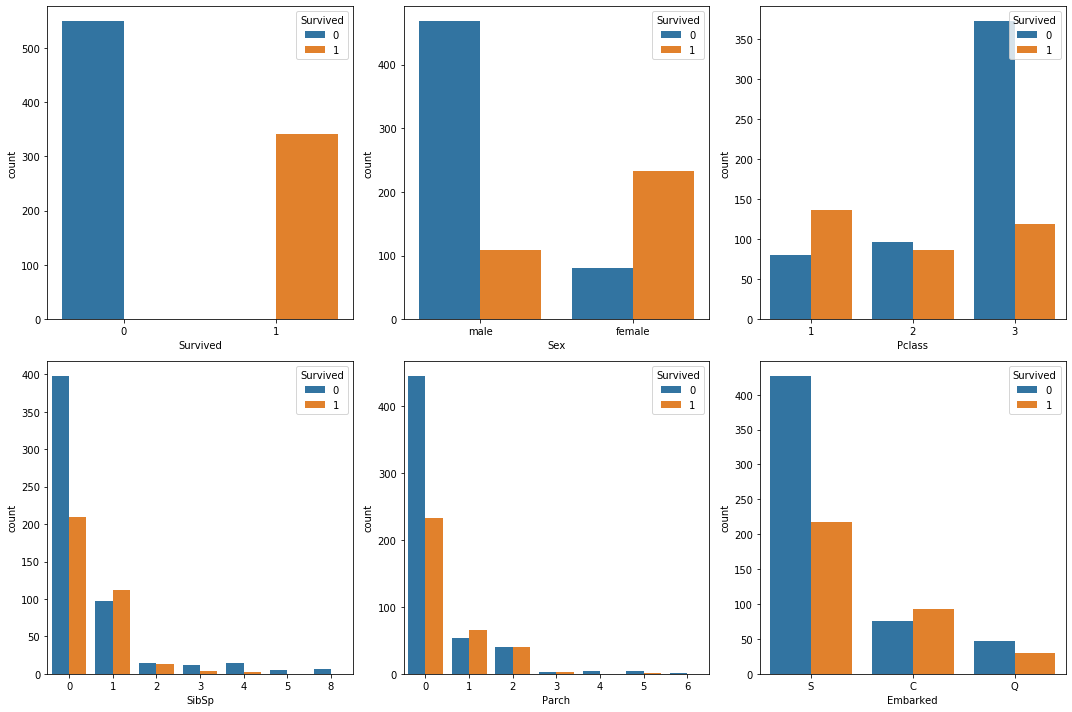

In [5]:
# Visualize the count of survivors for the following columns

columns = ['Survived','Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for row in range(0,n_rows):
    for col in range(0,n_cols):  
        pos = row*n_cols+ col   
        if pos <= 5:
            ax = axs[row][col] 
            sns.countplot(train_data[columns[pos]], hue=train_data["Survived"], ax=ax)
            #ax.set_title(columns[pos])
            ax.legend(title="Survived", loc='upper right') 
        
plt.tight_layout()

In [6]:
# Survival rate by sex and class
train_data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


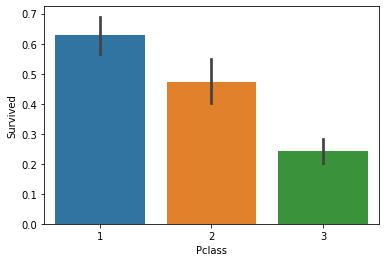

In [7]:
# Above data in bar plot
sns.barplot(x='Pclass', y='Survived', data=train_data)

In [8]:
# Survival rate by sex, age and class
age = pd.cut(train_data['Age'], [0, 18, 80])
train_data.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [9]:
# Counting NaN, NAN, na values in each column
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Drop unnecessary columns
train_data = train_data.drop(['Cabin','Ticket', 'Name'], axis=1)

# Drop the rows with missing values
train_data = train_data.dropna(subset =['Embarked', 'Age'])
train_data.shape

(712, 9)

In [12]:
#Look at the data types to see which columns need to be transformed / encoded to a number
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [13]:
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [14]:
# Transforming object data types to integers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode Sex column (4th) Column
train_data.iloc[:,3]= labelencoder.fit_transform(train_data.iloc[:,3].values)

#Encode Embarked (-1) Column
train_data.iloc[:,-1]= labelencoder.fit_transform(train_data.iloc[:,-1].values)

#Print the NEW unique values in the columns
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

[1 0]
[2 0 1]


In [15]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [24]:
#Split the data into independent 'X' and dependent 'Y' variables
X = train_data.iloc[:, 2:].values
Y = train_data.iloc[:, 1].values

In [25]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
# Scale the data to bring all features to the same level of magnitude
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)
print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)
print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)
print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
print('Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)
print('Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
print('Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

Logistic Regression Training Accuracy: 0.7978910369068541
K Nearest Neighbor Training Accuracy: 0.8664323374340949
Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
Decision Tree Classifier Training Accuracy: 0.9929701230228472
Random Forest Classifier Training Accuracy: 0.9753954305799648


C:\Users\sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
#Function to show the confusion matrix and accuracy

from sklearn.metrics import confusion_matrix
def conf_matrix(model):
    conf_mat = confusion_matrix(Y_test, model.predict(X_test))

    # Extracting true_positives, false_positives, true_negatives, false_negatives
    TN, FP, FN, TP = confusion_matrix(Y_test, model.predict(X_test)).ravel()
    print(conf_mat)
    #Classification accuracy is the ratio of correct predictions to total predictions made.
    print('Testing Accuracy = "{}"'.format( (TP + TN) / (TP + TN + FN + FP)))

In [29]:
conf_matrix(log)

[[73  9]
 [18 43]]
Testing Accuracy = "0.8111888111888111"


In [30]:
conf_matrix(knn)

[[71 11]
 [20 41]]
Testing Accuracy = "0.7832167832167832"


In [31]:
conf_matrix(svc_lin)

[[70 12]
 [18 43]]
Testing Accuracy = "0.7902097902097902"


In [32]:
conf_matrix(svc_rbf)

[[75  7]
 [22 39]]
Testing Accuracy = "0.7972027972027972"


In [33]:
conf_matrix(gauss)

[[69 13]
 [23 38]]
Testing Accuracy = "0.7482517482517482"


In [34]:
conf_matrix(tree)

[[60 22]
 [10 51]]
Testing Accuracy = "0.7762237762237763"


In [35]:
conf_matrix(forest)

[[67 15]
 [13 48]]
Testing Accuracy = "0.8041958041958042"


In [37]:
# Considering Random Forest Classification algorithm for classification
# Get the importance of the features
importances = pd.DataFrame({'feature':train_data.iloc[:, 2:].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


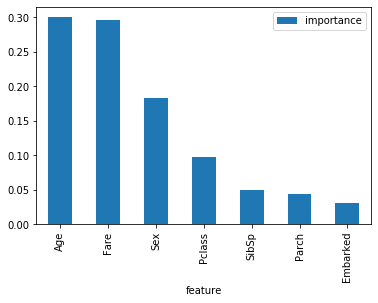

In [38]:
#Visualize the importance
importances.plot.bar()

In [51]:
test_data = pd.read_csv('test.csv')
actual_Y = pd.read_csv('gender_submission.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
# Drop unnecessary columns
test_data = test_data.drop(['PassengerId','Cabin','Ticket', 'Name'], axis=1)

# Drop the rows with missing values
test_data = test_data.dropna(subset =['Fare','Embarked', 'Age'])
test_data.shape

(331, 7)

In [55]:
test_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [56]:
print(test_data['Sex'].unique())
print(test_data['Embarked'].unique())

['male' 'female']
['Q' 'S' 'C']


In [60]:
# Transforming object data types to integers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode Sex column (2nd) Column
test_data.iloc[:,1]= labelencoder.fit_transform(test_data.iloc[:,1].values)

#Encode Embarked (-1) Column
test_data.iloc[:,-1]= labelencoder.fit_transform(test_data.iloc[:,-1].values)

#Print the NEW unique values in the columns
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

[1 0]
[2 0 1]


In [61]:
test_data.dtypes

Pclass        int64
Sex           int32
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [62]:
test_data['Predict Survived'] = forest.predict(test_data)

In [63]:
test_data['Predict Survived'].value_counts()

1    237
0     94
Name: Predict Survived, dtype: int64

# Required Prediction Plot for the Test data

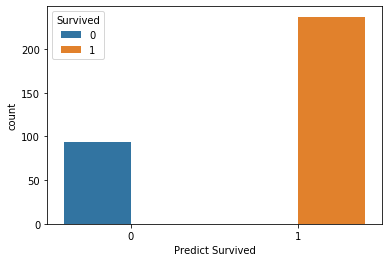

In [64]:
sns.countplot(test_data['Predict Survived'], hue=test_data['Predict Survived'])
plt.legend(title="Survived", loc='upper left') 
plt.show()